<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/statistical_inference_five_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code will load in a data set corresponding to the 2024 WNBA season. If you need to know what the variables mean you can find the original dataset [here](https://www.basketball-reference.com/wnba/years/2024_per_game.html):

### **Clone Business Analytics Repository**

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 649, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 649 (delta 240), reused 202 (delta 199), pack-reused 383 (from 1)
Receiving objects: 100% (649/649), 8.68 MiB | 14.86 MiB/s, done.
Resolving deltas: 100% (368/368), done.


### **Import Libraries**

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import math

### **Read In the Dataset**

In [3]:
df = pd.read_csv('/content/business-analytics/datasets/sportsref_download.csv')
df.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Lindsay Allen,CHI,G,39,925,39,27,23.7,2.6,5.5,0.472,0.4,1.2,0.311,2.3,4.4,0.515,1.1,1.3,0.808,0.3,2.0,3.9,0.8,0.2,1.6,1.6,6.7
1,Rebecca Allen,PHO,F-G,18,447,18,18,24.8,2.9,7.1,0.417,1.4,3.9,0.352,1.6,3.1,0.500,0.1,0.2,0.667,0.7,3.9,1.1,0.9,0.7,1.0,1.9,7.4
2,Laeticia Amihere,ATL,F,15,73,15,0,4.9,0.4,1.6,0.250,0.0,0.0,NaN,0.4,1.6,0.250,0.3,1.1,0.294,0.8,1.7,0.2,0.1,0.2,0.4,0.5,1.1
3,Ariel Atkins,WAS,G,39,1175,39,39,30.1,5.4,12.5,0.432,1.9,5.5,0.346,3.5,7.0,0.500,2.2,2.5,0.848,0.9,3.5,3.1,1.4,0.4,2.3,2.8,14.9
4,Amy Atwell,PHO,F,5,41,5,0,8.2,0.6,2.2,0.273,0.4,1.8,0.222,0.2,0.4,0.500,0.2,0.2,1.000,0.6,0.8,0.6,0.0,0.2,0.4,0.6,1.8


### **Assists Demeaned**

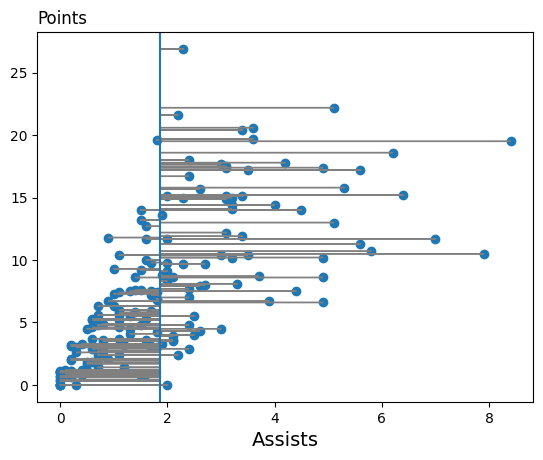

In [12]:
df['AST_demeaned'] = df['AST'].map(lambda x: x- df['AST'].mean())
plt.scatter(df['AST'], df['PTS'])
# Adding vertical arrows for AST_demeaned
for i in range(len(df)):
    plt.arrow(df['AST'].mean(), df['PTS'][i], df['AST_demeaned'][i], 0, ec='grey')
plt.axvline(df['AST'].mean())
plt.xlabel('Assists', size=14)
plt.title('Points', loc='left')
plt.show()

### **Points Demeaned**

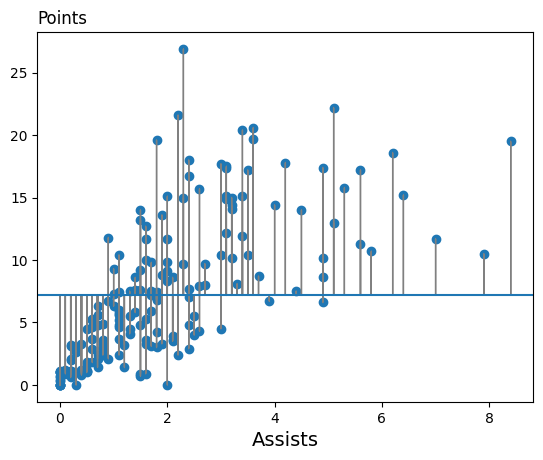

In [16]:
df['PTS_demeaned'] = df['PTS'].map(lambda x: x- df['PTS'].mean())
plt.scatter(df['AST'], df['PTS'])
for i in range(len(df)):
    plt.arrow(df['AST'][i], df['PTS'].mean(), 0, df['PTS_demeaned'][i], ec='grey')
plt.axhline(df['PTS'].mean())
plt.xlabel('Assists', size=14)
plt.title('Points', loc='left')
plt.show()

### **Mortgage Dataset**

In [17]:
qs = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')
qs.head()

<ipython-input-17-0663ba346fe6>:1: DtypeWarning: Columns (34,36,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')


,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,41-1795868,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,350,Preapproval was not requested,2,Loan originated,1,Boston - MA,14454.0,Massachusetts,MA,25,Plymouth County,23.0,5117.01,Not Hispanic or Latino,2,Hispanic or Latino,1,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,Male,1,64.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4444.0,40.590000,94300.0,83.470001,1435.0,1724.0,NaN
1,2017,0000026336,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,550,Preapproval was not requested,2,Loan originated,1,"Cambridge, Newton, Framingham - MA",15764.0,Massachusetts,MA,25,Middlesex County,17.0,3746.00,Hispanic or Latino,1,Not Hispanic or Latino,2,American Indian or Alaska Native,1,White,5.0,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,179.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4755.0,27.440001,104800.0,133.389999,1352.0,1949.0,NaN
2,2017,0000024224,Office of the Comptroller of the Currency,OCC,1,VA-guaranteed,3,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,630,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7614.00,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,NaN,Other type of purchaser,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,6567.0,20.820000,84000.0,172.990005,1711.0,1883.0,NaN
3,2017,7197000003,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,298,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7502.00,"Information not provided by applicant in mail,...",3,No co-applicant,5,"I

### **Correlation**

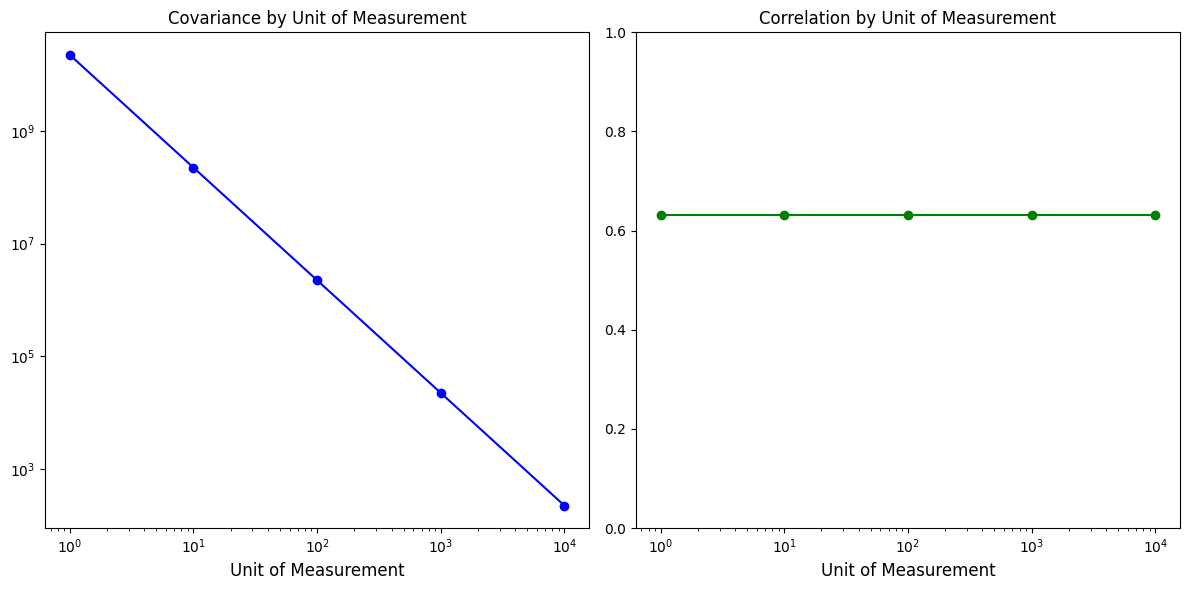

In [45]:
qs['loan_amount'] = qs['loan_amount_000s'].map(lambda x: x*1000)
qs['applicant_income'] = qs['applicant_income_000s'].map(lambda x: x*1000)

amounts = [ 1, 10, 100, 1000, 10000]
results = {'cov': [], 'corr': []}

for amount in amounts:
  qs['l'] = qs['loan_amount'].map(lambda x : x/amount)
  qs['i'] = qs['applicant_income'].map(lambda x : x/amount)
  results['cov'].append(qs['l'].cov(qs['i']))
  results['corr'].append(qs['l'].corr(qs['i']))

# Creating side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting Covariance
axes[0].plot(amounts, results['cov'], label='Covariance', color='blue', marker='o')
axes[0].set_title('Covariance by Unit of Measurement', loc='center')
axes[0].set_xlabel('Unit of Measurement', size=12)
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# Plotting Correlation
axes[1].plot(amounts, results['corr'], label='Correlation', color='green', marker='o')
axes[1].set_title('Correlation by Unit of Measurement', loc='center')
axes[1].set_xlabel('Unit of Measurement', size=12)
axes[1].set_xscale('log')
axes[1].set_ylim(0, 1)

# Display the plots
plt.tight_layout()
plt.show()

### **Create a Dictionary**
The keys of this dictionary are position and the values are integers. Don't worry if you don't every aspect of this code initially. We haven't covered a couple of concepts that are used here like list comprehension and enumerate.

In [ ]:
my_dict = {v:k for k,v in enumerate(pd.unique(df['Pos']))}

### **Create Numerical Encoding for Positions**

In [ ]:
df['Pos_num'] = df['Pos'].map(my_dict)

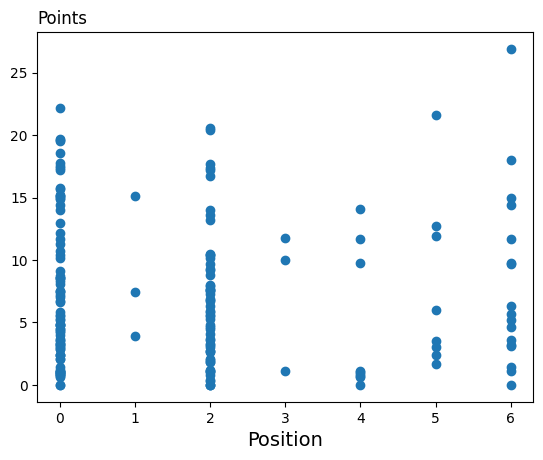

In [ ]:
plt.scatter(df['Pos_num'], df['PTS'])
plt.title('Points', loc='left')
plt.xlabel("Position", size=14)
plt.show()